In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
results = h5py.File('indy_20160407_02.h5', 'r')

In [4]:
np.median(np.median(results['uoi/decoding_x'], axis=2), axis=0)

<HDF5 dataset "decoding_x": shape (20, 50, 5), type "<f8">

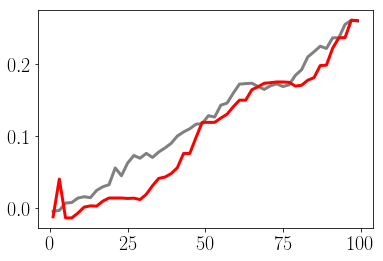

In [9]:
plt.plot(
    np.arange(1, 100, 2),
    np.median(np.median(results['cur/decoding_x'], axis=2), axis=0),
    color='gray',
    linewidth=3
)

plt.plot(
    np.arange(1, 100, 2),
    np.median(np.median(results['uoi/decoding_x'], axis=2), axis=0),
    color='r',
    linewidth=3
)

In [10]:
np.median(results['cur/decoding_x'], axis=2).shape

(20, 50)

In [17]:
np.median(results['uoi/decoding_x'], axis=2).shape

(20, 50)

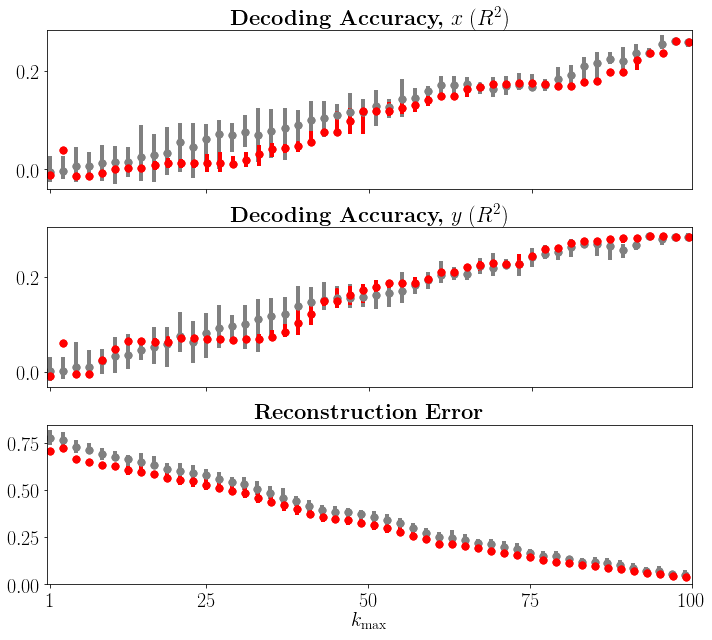

In [40]:
fig, axes = plt.subplots(3, 1, figsize=(10, 9), sharex=True)

axes[0].boxplot(
    positions=np.arange(1, 100, 2) - 0.02,
    x=[np.median(results['cur/decoding_x'], axis=2)[:, idx] for idx in range(50)],
    widths=0,
    boxprops={'linewidth' : 4, 'color' : 'gray'},
    medianprops={'marker' : '.', 'markersize' : 14, 'color' : 'gray'},
    whiskerprops={'linewidth' : 4, 'color' : 'gray'},
    showfliers=False
)

axes[0].boxplot(
    positions=np.arange(1, 100, 2) + 0.02,
    x=[np.median(results['uoi/decoding_x'], axis=2)[:, idx] for idx in range(50)],
    widths=0,
    boxprops={'linewidth' : 4, 'color' : 'red'},
    medianprops={'marker' : '.', 'markersize' : 14, 'color' : 'red'},
    whiskerprops={'linewidth' : 4, 'color' : 'red'},
    showfliers=False
)

axes[1].boxplot(
    positions=np.arange(1, 100, 2) - 0.02,
    x=[np.median(results['cur/decoding_y'], axis=2)[:, idx] for idx in range(50)],
    widths=0,
    boxprops={'linewidth' : 4, 'color' : 'gray'},
    medianprops={'marker' : '.', 'markersize' : 14, 'color' : 'gray'},
    whiskerprops={'linewidth' : 4, 'color' : 'gray'},
    showfliers=False
)

axes[1].boxplot(
    positions=np.arange(1, 100, 2) + 0.02,
    x=[np.median(results['uoi/decoding_y'], axis=2)[:, idx] for idx in range(50)],
    widths=0,
    boxprops={'linewidth' : 4, 'color' : 'red'},
    medianprops={'marker' : '.', 'markersize' : 14, 'color' : 'red'},
    whiskerprops={'linewidth' : 4, 'color' : 'red'},
    showfliers=False
)

axes[2].boxplot(
    positions=np.arange(1, 100, 2) - 0.02,
    x=[results['cur/reconstructions'][:, idx] for idx in range(50)],
    widths=0,
    boxprops={'linewidth' : 4, 'color' : 'gray'},
    medianprops={'marker' : '.', 'markersize' : 14, 'color' : 'gray'},
    whiskerprops={'linewidth' : 4, 'color' : 'gray'},
    showfliers=False
)

axes[2].boxplot(
    positions=np.arange(1, 100, 2) + 0.02,
    x=[results['uoi/reconstructions'][:, idx] for idx in range(50)],
    widths=0,
    boxprops={'linewidth' : 4, 'color' : 'red'},
    medianprops={'marker' : '.', 'markersize' : 14, 'color' : 'red'},
    whiskerprops={'linewidth' : 4, 'color' : 'red'},
    showfliers=False
)

axes[0].set_title(r'\textbf{Decoding Accuracy,} $x$ $(R^2)$', fontsize=22)
axes[1].set_title(r'\textbf{Decoding Accuracy,} $y$ $(R^2)$', fontsize=22)
axes[2].set_title(r'\textbf{Reconstruction Error}', fontsize=22)
axes[2].set_xticks([1, 25, 50, 75, 100])
axes[2].set_xticklabels([1, 25, 50, 75, 100])
axes[2].set_xlabel(r'$k_{\text{max}}$', fontsize=20)
plt.tight_layout()

plt.savefig('cur.pdf', bbox_inches='tight')
plt.show()